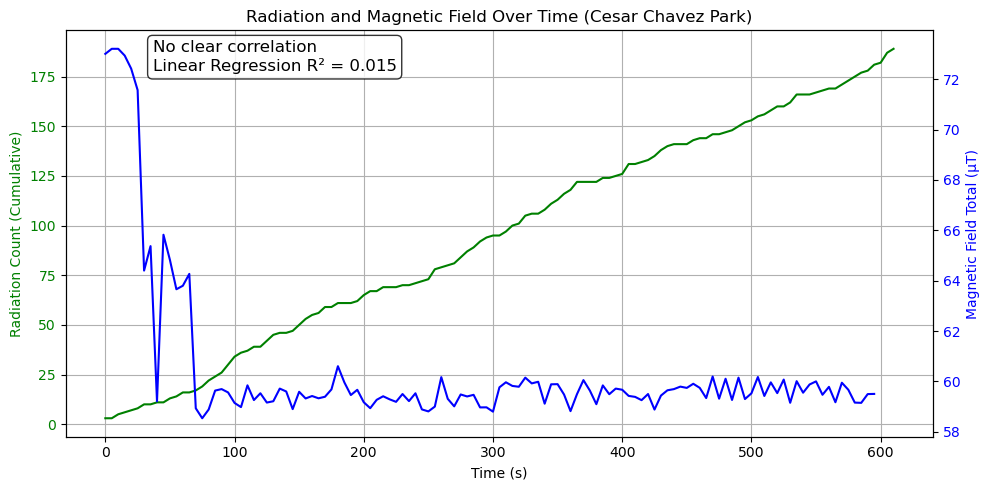

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




# === Load Data ===
rad_df = pd.read_csv("Spectrum_Loc6_session1_group1_2025-04-29_15-20-14.csv")
mag_df = pd.read_csv("magnetometer_6.csv")

# === Prepare Radiation Data ===
rad_df["Cumulative_Count"] = rad_df.iloc[:, -1]  # last column = cumulative radiation count
time = np.arange(len(rad_df)) * 5  # assuming each row is 5-second interval

# === Compute Count per Interval (for R²) ===
rad_df["Count_Per_Interval"] = rad_df["Cumulative_Count"].diff()
rad_df_clean = rad_df.dropna(subset=["Count_Per_Interval"]).reset_index(drop=True)

# === Align Magnetic Field Data to Radiation Timing ===
mag_field_aligned = mag_df.iloc[::5].reset_index(drop=True)
mag_field = mag_field_aligned["Mag_Total (uT)"][:len(time)]

# === Compute R² (Radiation per interval vs Magnetic Field) ===
X = mag_field_aligned["Mag_Total (uT)"][:len(rad_df_clean)].values.reshape(-1, 1)
y = rad_df_clean["Count_Per_Interval"].values



# === Slice to minimum length to avoid mismatch ===
min_len = min(len(rad_df_clean), len(mag_field_aligned))

X = mag_field_aligned["Mag_Total (uT)"][:min_len].values.reshape(-1, 1)
y = rad_df_clean["Count_Per_Interval"][:min_len].values

# === Linear Regression ===
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)

# === Combined Dual-Axis Plot ===
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot radiation on left Y-axis
ax1.plot(time, rad_df["Cumulative_Count"], color='green', label="Radiation Count (Cumulative)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Radiation Count (Cumulative)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)

# Plot magnetic field on right Y-axis
mag_field_3 = mag_field_aligned["Mag_Total (uT)"][:len(time)]
ax2 = ax1.twinx()
ax2.plot(time[:len(mag_field_3)], mag_field_3, color='blue', label="Magnetic Field")
ax2.set_ylabel("Magnetic Field Total (μT)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add R² annotation
ax1.text(0.1, 0.9, f"No clear correlation\nLinear Regression R² = {r_squared:.3f}",
         transform=ax1.transAxes, fontsize=12,
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.title("Radiation and Magnetic Field Over Time (Cesar Chavez Park)")
plt.tight_layout()
plt.show()